In [38]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, precision_score
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('bank-full.csv', delimiter=';')

In [40]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [48]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

def encoder(df, categorical_features):
    label_encoder = LabelEncoder()
    for column in categorical_features:
        df[column] = label_encoder.fit_transform(df[column])
    return df


In [49]:
encoder(df, categorical_features)

age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0      825        0     0        0   
45207   71    5        0          0        0     1729        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45209   57    1        1          1        0      668        0     0        1   
45210   37    2        1          1        0     2971        0     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  y  
0        5      8       261         1     -1         0         3  0  
1        5      8       151         1     -1         0         3  0  
2        5      8        76         1     -1         0         3  0  
3        5      8        92         1     -1         0         3  0  
4        5      8       198         1     -1         0         3  0  
...    ...    ...       ...       ...    ...       ...       ... ..  
45206   17      9       977         3     -1         0         3  1  
45207   17      9       456         2     -1         0         3  1  
45208   17      9      1127         5    184         3         2  1  
45209   17      9       508         4     -1         0         3  0  
45210   17      9       361         2    188        11         1  0  

[45211 rows x 17 columns]

In [5]:
df.to_csv('bank_data_coded.csv', index=False)

In [6]:
X = df.drop('y', axis=1)
y = df['y']

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np

In [23]:
def decision_tree(X, y):
    train_accuracies = []
    test_accuracies = []
    precisions = []
    recalls = []
    depth_values = range(1,21)

    for depth in depth_values:
        tree = DecisionTreeClassifier(max_depth=depth)
        scores = cross_validate(tree, X, y, cv=5, scoring=['accuracy', 'precision', 'recall'], return_train_score=True)
        
        train_accuracy = np.mean(scores['train_accuracy'])
        test_accuracy = np.mean(scores['test_accuracy'])
        precision = np.mean(scores['test_precision'])
        recall = np.mean(scores['test_recall'])
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        precisions.append(precision)
        recalls.append(recall)

    plt.figure(figsize=(10, 5))
    plt.plot(depth_values, train_accuracies, label='Mean Train Accuracy')
    plt.plot(depth_values, test_accuracies, label='Mean Test Accuracy')
    plt.xlabel('Max Depth of Decision Tree')
    plt.ylabel('Accuracy')
    plt.title('Cross Validation Score for Different Depth')
    plt.legend()
    plt.show()
    
    best_precision_index = np.argmax(precisions)
    best_recall_index = np.argmax(recalls)
    best_precision = precisions[best_precision_index]
    best_recall = recalls[best_recall_index]
    best_precision_depth = depth_values[best_precision_index]
    best_recall_depth = depth_values[best_recall_index]
    
    print("Best Precision: ", best_precision)
    print("Best Precision Depth: ", best_precision_depth)
    print("Best Recall: ", best_recall)
    print("Best Recall Depth: ", best_recall_depth)
    
    return precisions, recalls

/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics

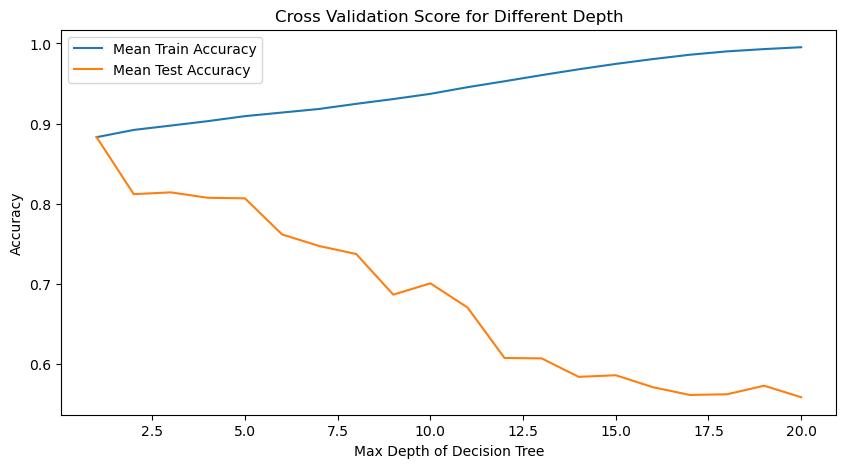

Best Precision:  0.234809233759033
Best Precision Depth:  5
Best Recall:  0.3281931778958532
Best Recall Depth:  19


([0.0,
  0.20208795134451157,
  0.15865120701509022,
  0.22956350509254836,
  0.234809233759033,
  0.20306727935706298,
  0.18051861962984694,
  0.17230696061738152,
  0.11241262393675241,
  0.12467251505514107,
  0.10748241049394555,
  0.09501732827876358,
  0.09549038463569837,
  0.09077147537046382,
  0.09456466524260188,
  0.09106117417979726,
  0.0872729440621402,
  0.08973225282399291,
  0.09352097494413161,
  0.08820530428416115],
 [0.0,
  0.1565864799080037,
  0.12821267166589467,
  0.22117685141633867,
  0.2527454918421255,
  0.30341802690855635,
  0.28470955176847845,
  0.25974464949664944,
  0.2820541068365904,
  0.29566666010912934,
  0.2867821508603191,
  0.30172349965036405,
  0.30077581627926525,
  0.30966372352468824,
  0.31004179535833665,
  0.32100909768882574,
  0.31930813212126197,
  0.32573821476411646,
  0.3281931778958532,
  0.3268727879489156])

In [24]:
decision_tree(X, y)

# Random Forest

In [35]:
def random_forest(X, y):

    rf = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [10, 50, 100]
    }

    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
    grid_search.fit(X, y)

    results = grid_search.cv_results_
    plt.figure(figsize=(10, 5))
    plt.plot(param_grid['n_estimators'], results['mean_train_score'], label='Training score')
    plt.plot(param_grid['n_estimators'], results['mean_test_score'], label='Test score')
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.title('Cross-Validation Score for Different n_estimators')
    plt.legend()
    plt.grid(True)
    plt.show()

    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)

    print("Recall:", recall)
    print("Precision:", precision)
    
    return best_rf

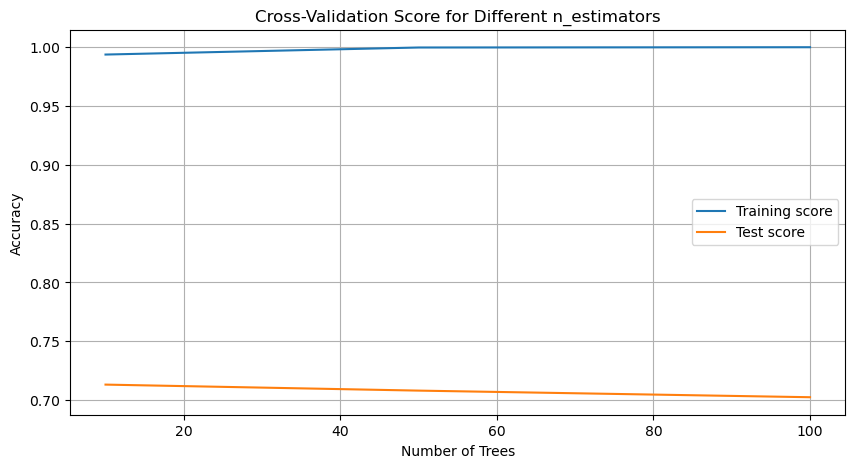

Recall: 0.9393079977311402
Precision: 0.9953917050691244


In [14]:
best_model = evaluate_random_forest(X, y)

# Married Data

In [31]:
from sklearn.model_selection import train_test_split

In [28]:
married_data = pd.read_csv('married_data.csv')
married_data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   33  entrepreneur  married  secondary      no        2     yes  yes   
2   47   blue-collar  married    unknown      no     1506     yes   no   
3   35    management  married   tertiary      no      231     yes   no   
4   58       retired  married    primary      no      121     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may        76         1     -1         0  unknown  no  
2  unknown    5   may        92         1     -1         0  unknown  no  
3  unknown    5   may       139         1     -1         0  unknown  no  
4  unknown    5   may        50         1     -1         0  unknown  no

In [30]:
married_data.drop(columns=['marital'], inplace=True)
married_data.head()

age           job  education default  balance housing loan  contact  day  \
0   58    management   tertiary      no     2143     yes   no  unknown    5   
1   33  entrepreneur  secondary      no        2     yes  yes  unknown    5   
2   47   blue-collar    unknown      no     1506     yes   no  unknown    5   
3   35    management   tertiary      no      231     yes   no  unknown    5   
4   58       retired    primary      no      121     yes   no  unknown    5   

  month  duration  campaign  pdays  previous poutcome   y  
0   may       261         1     -1         0  unknown  no  
1   may        76         1     -1         0  unknown  no  
2   may        92         1     -1         0  unknown  no  
3   may       139         1     -1         0  unknown  no  
4   may        50         1     -1         0  unknown  no

In [50]:
# encoding
categorical_features = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
encoder(married_data, categorical_features)

age  job  education  default  balance  housing  loan  contact  day  \
0       58    4          2        0     2143        1     0        2    5   
1       33    2          1        0        2        1     1        2    5   
2       47    1          3        0     1506        1     0        2    5   
3       35    4          2        0      231        1     0        2    5   
4       58    5          0        0      121        1     0        2    5   
...    ...  ...        ...      ...      ...      ...   ...      ...  ...   
27209   73    5          1        0     2850        0     0        0   17   
27210   51    9          2        0      825        0     0        0   17   
27211   72    5          1        0     5715        0     0        0   17   
27212   57    1          1        0      668        0     0        1   17   
27213   37    2          1        0     2971        0     0        0   17   

       month  duration  campaign  pdays  previous  poutcome  y  
0          8       261         1     -1         0         3  0  
1          8        76         1     -1         0         3  0  
2          8        92         1     -1         0         3  0  
3          8       139         1     -1         0         3  0  
4          8        50         1     -1         0         3  0  
...      ...       ...       ...    ...       ...       ... ..  
27209      9       300         1     40         8         0  1  
27210      9       977         3     -1         0         3  1  
27211      9      1127         5    184         3         2  1  
27212      9       508         4     -1         0         3  0  
27213      9       361         2    188        11         1  0  

[27214 rows x 16 columns]

In [51]:
train_married, validate_married = train_test_split(married_data, test_size=0.1, random_state=42)

In [ ]:
## Training

/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics

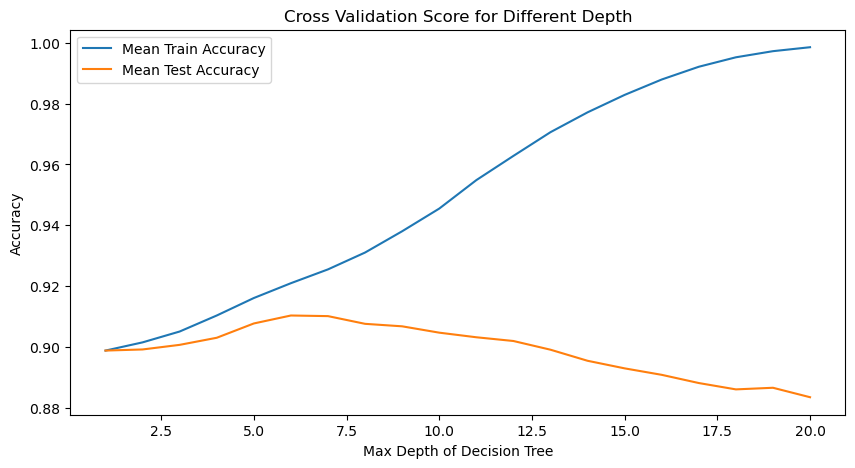

Best Precision:  0.5859692731928366
Best Precision Depth:  7
Best Recall:  0.4434538937764744
Best Recall Depth:  19


([0.0,
  0.40465557860504325,
  0.5270695126904313,
  0.5291233606883963,
  0.5744884516195965,
  0.5815035364378683,
  0.5859692731928366,
  0.5630380394995786,
  0.5553566294749872,
  0.540697594085985,
  0.5280965832572175,
  0.5192192558274936,
  0.5015084828930811,
  0.48120548078676145,
  0.4667883598087311,
  0.4577783882709644,
  0.4463722697270307,
  0.43626667955070497,
  0.4400529611484731,
  0.42711026391052653],
 [0.0,
  0.13285516454871293,
  0.23344248941023132,
  0.33074861518409904,
  0.340865917236885,
  0.4127517106549365,
  0.38650374714890845,
  0.392960247637667,
  0.39741202346041055,
  0.39539833822091885,
  0.4099348321928967,
  0.41720104268491365,
  0.4180066797002281,
  0.42084392310198765,
  0.4131581948517432,
  0.43052134245682633,
  0.4394069729553601,
  0.4305311176278918,
  0.4434538937764744,
  0.44304985337243397])

In [52]:
# Decision tree
decision_tree(train_married.drop('y', axis=1), train_married['y'])

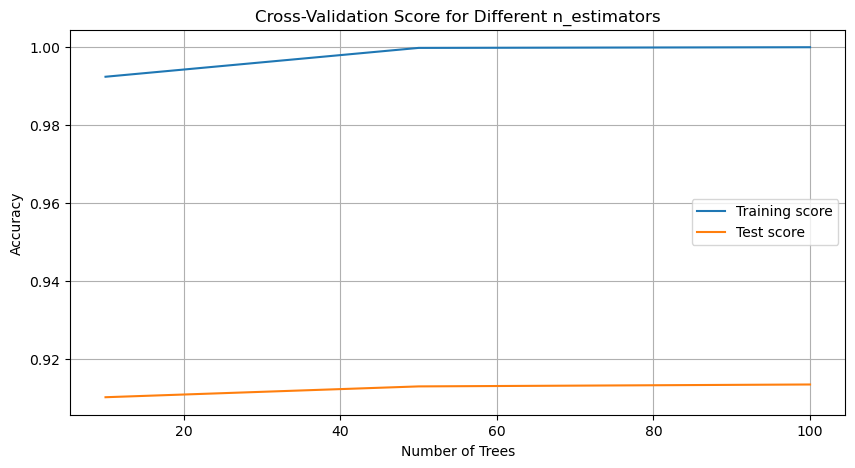

Recall: 1.0
Precision: 1.0


RandomForestClassifier(random_state=42)

In [53]:
# random forest
random_forest(train_married.drop('y', axis=1), train_married['y'])

In [54]:
## Testing


In [71]:
from sklearn.metrics import confusion_matrix
# Decision tree
def validate_decision_tree(max_depth, train_data, validate_data):
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(train_data.drop('y', axis=1), train_data['y'])
    dt_pred = dt.predict(validate_data.drop('y', axis=1))
    cm = confusion_matrix(validate_data['y'], dt_pred)
    TN, FP, FN, TP = cm.ravel()
    dt_precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    dt_recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return dt_precision, dt_recall

In [72]:
max_depth = 7
validate_decision_tree(max_depth, train_married, validate_married)

(0.6402116402116402, 0.4336917562724014)

In [73]:
# Random forest
def validate_random_forest(n_estimators, train_data, validate_data):
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(train_data.drop('y', axis=1), train_data['y'])
    rf_pred = rf.predict(validate_data.drop('y', axis=1))
    cm1 = confusion_matrix(validate_data['y'], rf_pred)
    TN, FP, FN, TP = cm1.ravel()
    rf_precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    rf_recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return rf_precision, rf_recall

In [77]:
n_estimators = 60
validate_random_forest(n_estimators, train_married, validate_married)

(0.6666666666666666, 0.35842293906810035)

# Single Data

In [78]:
single_data = pd.read_csv('single_data.csv')
single_data.head()

age         job marital  education default  balance housing loan  contact  \
0   44  technician  single  secondary      no       29     yes   no  unknown   
1   33     unknown  single    unknown      no        1      no   no  unknown   
2   28  management  single   tertiary      no      447     yes  yes  unknown   
3   43  technician  single  secondary      no      593     yes   no  unknown   
4   29      admin.  single  secondary      no      390     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y  
0    5   may       151         1     -1         0  unknown  no  
1    5   may       198         1     -1         0  unknown  no  
2    5   may       217         1     -1         0  unknown  no  
3    5   may        55         1     -1         0  unknown  no  
4    5   may       137         1     -1         0  unknown  no

In [79]:
single_data.drop(columns=['marital'], inplace=True)
single_data.head()

age         job  education default  balance housing loan  contact  day  \
0   44  technician  secondary      no       29     yes   no  unknown    5   
1   33     unknown    unknown      no        1      no   no  unknown    5   
2   28  management   tertiary      no      447     yes  yes  unknown    5   
3   43  technician  secondary      no      593     yes   no  unknown    5   
4   29      admin.  secondary      no      390     yes   no  unknown    5   

  month  duration  campaign  pdays  previous poutcome   y  
0   may       151         1     -1         0  unknown  no  
1   may       198         1     -1         0  unknown  no  
2   may       217         1     -1         0  unknown  no  
3   may        55         1     -1         0  unknown  no  
4   may       137         1     -1         0  unknown  no

In [80]:
# encoding
categorical_features = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
encoder(single_data, categorical_features)

age  job  education  default  balance  housing  loan  contact  day  \
0       44    9          1        0       29        1     0        2    5   
1       33   11          3        0        1        0     0        2    5   
2       28    4          2        0      447        1     1        2    5   
3       43    9          1        0      593        1     0        2    5   
4       29    0          1        0      390        1     0        2    5   
...    ...  ...        ...      ...      ...      ...   ...      ...  ...   
12785   36    4          1        0     1511        1     0        0   16   
12786   34    1          1        0     1475        1     0        0   16   
12787   34    0          1        0      557        0     0        0   17   
12788   23    8          2        0      113        0     0        0   17   
12789   25    9          1        0      505        0     1        0   17   

       month  duration  campaign  pdays  previous  poutcome  y  
0          8       151         1     -1         0         3  0  
1          8       198         1     -1         0         3  0  
2          8       217         1     -1         0         3  0  
3          8        55         1     -1         0         3  0  
4          8       137         1     -1         0         3  0  
...      ...       ...       ...    ...       ...       ... ..  
12785      9       270         1     -1         0         3  1  
12786      9      1166         3    530        12         1  0  
12787      9       224         1     -1         0         3  1  
12788      9       266         1     -1         0         3  1  
12789      9       386         2     -1         0         3  1  

[12790 rows x 16 columns]

In [81]:
train_single, validate_single = train_test_split(single_data, test_size=0.1, random_state=42)

In [82]:
## Training

/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics

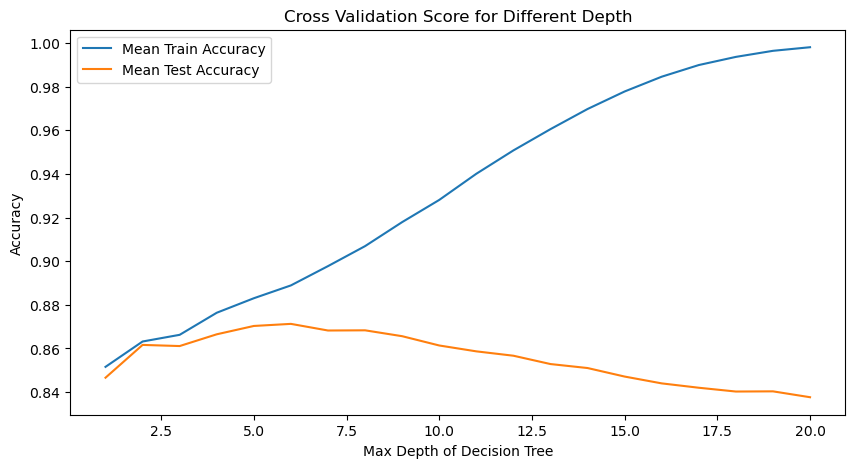

Best Precision:  0.605416693832094
Best Precision Depth:  6
Best Recall:  0.49185709470845973
Best Recall Depth:  18


([0.2836720580212445,
  0.5948791661774091,
  0.5959002386741817,
  0.5844102559823925,
  0.6049154617268517,
  0.605416693832094,
  0.5759713691224181,
  0.5788082271250901,
  0.5624372759352041,
  0.5443187718084891,
  0.5334866392394649,
  0.5240926361848267,
  0.5095861762793853,
  0.5039117157384347,
  0.4899233829967932,
  0.48022372996424895,
  0.4735954171246789,
  0.4684254440933301,
  0.46914521386393016,
  0.4605811688296287],
 [0.2233973710819009,
  0.23635658914728683,
  0.23523255813953486,
  0.3693073811931244,
  0.3908240647118301,
  0.4035962251432424,
  0.46400404448938326,
  0.4396090326929559,
  0.4610953825412875,
  0.4604988203572632,
  0.458164812942366,
  0.47152005392652513,
  0.475005055611729,
  0.4883653522076171,
  0.4785035389282103,
  0.48720593191776207,
  0.4854634310751601,
  0.49185709470845973,
  0.49128918099089985,
  0.4860431412200876])

In [83]:
# Decision tree
decision_tree(train_single.drop('y', axis=1), train_single['y'])

In [84]:
# random forest
random_forest(train_single.drop('y', axis=1), train_single['y'])

TypeError: 'numpy.float64' object is not callable

In [ ]:
## Testing

In [87]:
max_depth = 16
validate_decision_tree(max_depth, train_single, validate_single)

(0.5476190476190477, 0.4842105263157895)

In [96]:
n_estimators = 55
validate_random_forest(n_estimators, train_single, validate_single)

(0.6692307692307692, 0.45789473684210524)

# Divorced Data

In [98]:
divorce_data = pd.read_csv('divorced_data.csv')
divorce_data.head()

age           job   marital  education default  balance housing loan  \
0   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
1   41        admin.  divorced  secondary      no      270     yes   no   
2   57    technician  divorced  secondary      no       63     yes   no   
3   36        admin.  divorced  secondary      no      506     yes   no   
4   44      services  divorced  secondary      no     2586     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       380         1     -1         0  unknown  no  
1  unknown    5   may       222         1     -1         0  unknown  no  
2  unknown    5   may       242         1     -1         0  unknown  no  
3  unknown    5   may       577         1     -1         0  unknown  no  
4  unknown    5   may       160         1     -1         0  unknown  no

In [99]:
divorce_data.drop(columns=['marital'], inplace=True)
divorce_data.head()

age           job  education default  balance housing loan  contact  day  \
0   42  entrepreneur   tertiary     yes        2     yes   no  unknown    5   
1   41        admin.  secondary      no      270     yes   no  unknown    5   
2   57    technician  secondary      no       63     yes   no  unknown    5   
3   36        admin.  secondary      no      506     yes   no  unknown    5   
4   44      services  secondary      no     2586     yes   no  unknown    5   

  month  duration  campaign  pdays  previous poutcome   y  
0   may       380         1     -1         0  unknown  no  
1   may       222         1     -1         0  unknown  no  
2   may       242         1     -1         0  unknown  no  
3   may       577         1     -1         0  unknown  no  
4   may       160         1     -1         0  unknown  no

In [100]:
# encoding
categorical_features = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
encoder(divorce_data, categorical_features)

age  job  education  default  balance  housing  loan  contact  day  \
0      42    2          2        1        2        1     0        2    5   
1      41    0          1        0      270        1     0        2    5   
2      57    9          1        0       63        1     0        2    5   
3      36    0          1        0      506        1     0        2    5   
4      44    7          1        0     2586        1     0        2    5   
...   ...  ...        ...      ...      ...      ...   ...      ...  ...   
5202   49   10          2        0      780        0     0        0    8   
5203   42    0          1        0      490        1     0        0    8   
5204   36    0          1        0     1224        1     0        0   12   
5205   75    5          2        0     3810        1     0        0   16   
5206   71    5          0        0     1729        0     0        0   17   

      month  duration  campaign  pdays  previous  poutcome  y  
0         8       380         1     -1         0         3  0  
1         8       222         1     -1         0         3  0  
2         8       242         1     -1         0         3  0  
3         8       577         1     -1         0         3  0  
4         8       160         1     -1         0         3  0  
...     ...       ...       ...    ...       ...       ... ..  
5202      9       148         1    871         2         0  0  
5203      9       212         1     97         5         1  0  
5204      9       482         1    374         1         2  1  
5205      9       262         1    183         1         0  1  
5206      9       456         2     -1         0         3  1  

[5207 rows x 16 columns]

In [101]:
train_divorce, validate_divorce = train_test_split(divorce_data, test_size=0.1, random_state=42)

In [ ]:
## Training

/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danieldu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics

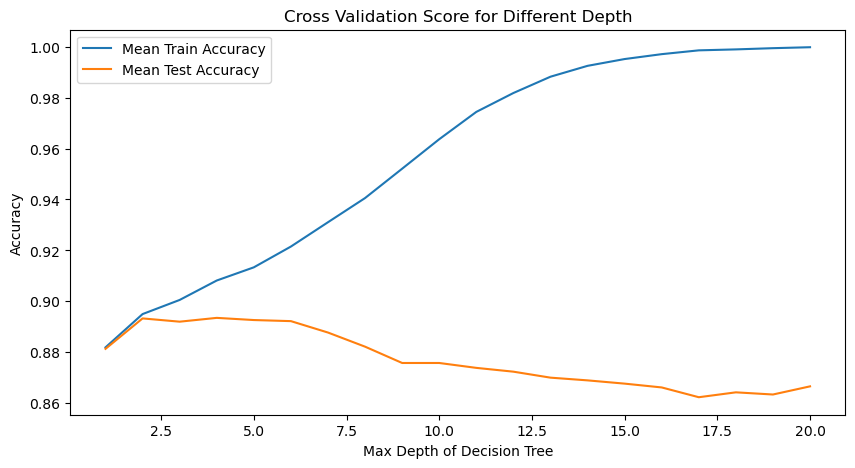

Best Precision:  0.595062410929284
Best Precision Depth:  2
Best Recall:  0.44092664092664097
Best Recall Depth:  15


([0.2030873888016745,
  0.595062410929284,
  0.5684270089324344,
  0.5751373479435522,
  0.5655851964259078,
  0.5669208378940702,
  0.5339114051690499,
  0.5067879866686866,
  0.4751450803035874,
  0.47555343172867853,
  0.46715818968191547,
  0.4603773275680174,
  0.4499482474711832,
  0.44721264853892667,
  0.44389220348057723,
  0.4357221316215609,
  0.422824754428189,
  0.43088044805436104,
  0.4249028222687607,
  0.4400005260576024],
 [0.15958815958815958,
  0.31724581724581724,
  0.42467824967824963,
  0.4067728442728443,
  0.43724259974259977,
  0.4103442728442729,
  0.4247586872586873,
  0.3673584298584298,
  0.39962998712998715,
  0.4033462033462033,
  0.419417631917632,
  0.41227477477477475,
  0.4140926640926641,
  0.4265926640926641,
  0.44092664092664097,
  0.42298906048906054,
  0.4212033462033462,
  0.42829794079794087,
  0.41579794079794086,
  0.4337837837837838])

In [102]:
# Decision tree
decision_tree(train_divorce.drop('y', axis=1), train_divorce['y'])

In [103]:
# random forest
random_forest(train_divorce.drop('y', axis=1), train_divorce['y'])

TypeError: 'numpy.float64' object is not callable

In [ ]:
## Testing

In [104]:
max_depth = 5
validate_decision_tree(max_depth, train_divorce, validate_divorce)

(0.5625, 0.421875)

In [105]:
n_estimators = 55
validate_random_forest(n_estimators, train_divorce, validate_divorce)

(0.6190476190476191, 0.40625)

In [109]:
from sklearn.decomposition import PCA
# 使用PCA进行特征选择，将特征数量具体减少到8个
married_data = pd.read_csv('married_data.csv')
label_encoders = {}
for column in married_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    married_data[column] = le.fit_transform(married_data[column])
    label_encoders[column] = le
married_data.head()
pca_8 = PCA(n_components=8)
married_data_pca_8 = pca_8.fit_transform(married_data.drop('y', axis=1))

train_married_pca_8, validate_married_pca_8, y_train, y_validate = train_test_split(
    married_data_pca_8, y, test_size=0.1, random_state=42)

train_married_pca_8.shape, validate_married_pca_8.shape


ValueError: Found input variables with inconsistent numbers of samples: [27214, 45211]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 设置n_estimators的范围，步长为20
n_estimators_range = range(10, 101, 20)  # 从10开始，避免0
mean_train_accuracies_rf = []
mean_test_accuracies_rf = []
best_precision_rf = 0
best_recall_rf = 0
best_precision_n_estimator_rf = 0
best_recall_n_estimator_rf = 0

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores_rf = cross_validate(rf, train_married_pca_8, y_train, cv=5, scoring=['precision', 'recall', 'accuracy'], return_train_score=True)
    mean_train_accuracies_rf.append(np.mean(scores_rf['train_accuracy']))
    mean_test_accuracies_rf.append(np.mean(scores_rf['test_accuracy']))
    
    mean_precision_rf = np.mean(scores_rf['test_precision'])
    mean_recall_rf = np.mean(scores_rf['test_recall'])
    
    if mean_precision_rf > best_precision_rf:
        best_precision_rf = mean_precision_rf
        best_precision_n_estimator_rf = n_estimators
        
    if mean_recall_rf > best_recall_rf:
        best_recall_rf = mean_recall_rf
        best_recall_n_estimator_rf = n_estimators

# 绘制随机森林模型的交叉验证效果图
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, mean_train_accuracies_rf, label='Mean Train Accuracy')
plt.plot(n_estimators_range, mean_test_accuracies_rf, label='Mean Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance with 8 PCA Components')
plt.legend()
plt.grid(True)
plt.show()

(best_precision_rf, best_precision_n_estimator_rf, best_recall_rf, best_recall_n_estimator_rf)
